# import Library

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Model ML Klasifikasi
from sklearn.ensemble import RandomForestClassifier

#Evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, average_precision_score

In [2]:
# Menampilkan seluruh DataFrame tanpa memotong hasil
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# EDA

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/~Kelas Work/PCA/dataset_1.csv')
data.head()

var_1  var_2  var_3  var_4  var_5  var_6  var_7  var_8  var_9  var_10  \
0      0      0    0.0   0.00    0.0      0      0      0      0       0   
1      0      0    0.0   3.00    0.0      0      0      0      0       0   
2      0      0    0.0   5.88    0.0      0      0      0      0       0   
3      0      0    0.0  14.10    0.0      0      0      0      0       0   
4      0      0    0.0   5.76    0.0      0      0      0      0       0   

   var_11  var_12  var_13  var_14  var_15  var_16  var_17  var_18  var_19  \
0     0.0     0.0     0.0       0       0     0.0     0.0    0.00       0   
1     0.0     0.0     0.0       0       3     0.0     0.0    0.00       0   
2     0.0     0.0     0.0       0       3     0.0     0.0    0.00       0   
3     0.0     0.0     0.0       0       0     0.0     0.0  988.47       0   
4     0.0     0.0     0.0       0       3     0.0     0.0    0.00       0   

   var_20     var_21  var_22  var_23  var_24  var_25  var_26  var_27  var_28  \
0       0     0.0000     0.0       0       0       0     0.0     0.0       0   
1       0     2.7300     0.0       0       0       0     0.0     0.0       0   
2       0    19.8990     0.0       0       0       0     0.0     0.0       0   
3       0     0.0000     0.0       0       0       0     0.0     0.0       0   
4       0  5981.1741     0.0       0       0       0     0.0     0.0       0   

   var_29      var_30  var_31  var_32  var_33  var_34      var_35  var_36  \
0    1.98      0.0000       3     0.0       0       0      0.0000       0   
1    1.92      0.0000       0     0.0       0       0      2.9100       0   
2    1.94  69867.6741       3     0.0       0       0  71397.5526       0   
3    7.44      0.0000       6     0.0       0       0     19.0164       0   
4    1.94      0.0000       3     0.0       0       0   6285.6000       0   

   var_37  var_38  var_39  var_40    var_41  var_42  var_43  var_44  var_45  \
0       0       0     0.0     0.0    0.0000     0.0       0       0       0   
1       0       0     0.0     0.0    0.0000     0.0       0       0       0   
2       0       3     0.0     0.0    0.0000     0.0       0       0       0   
3       0       0     0.0     0.0  614.1627     0.0       0       0       0   
4       0       0     0.0     0.0    0.0000     0.0       0       0       0   

          var_46  var_47  var_48  var_49  var_50  var_51  var_52  var_53  \
0  190245.329100     0.0     0.0      99    0.00       0       0       0   
1  111445.430066     0.0     0.0       2    0.00       0       0       0   
2  112618.539856     0.0     0.0       2   11.04       0       0       0   
3   39852.113400     0.0     0.0       2    5.94       0       0       0   
4  119538.619200     0.0     0.0       1    2.85       0       0       0   

   var_54      var_55  var_56  var_57  var_58  var_59  var_60  var_61  var_62  \
0       0      0.0000       0     0.0       0       0       0       0       3   
1       0      2.6226       0     0.0       0       0       0       0       0   
2       0  22874.0550       0     0.0       3       0       0       0       3   
3       0      0.0000       0  3116.4       0       0       0       0       6   
4       0   4074.2619       0     0.0       0       0       0       0       3   

   var_63  var_64  var_65  var_66  var_67  var_68  var_69  var_70  var_71  \
0       0     0.0     0.0       0       0       0       0       1       0   
1       0     0.0     0.0       0       0       0       0       1       0   
2       0     0.0     0.0       0       0       0       0       1       0   
3       0     0.0     0.0       0       0       0       0       0       0   
4       0     0.0     0.0       0       0       0       0       1       0   

   var_72  var_73  var_74    var_75      var_76  var_77  var_78  var_79  \
0       0       0       2     0.000      0.0000     0.0     0.0     0.0   
1       0       0       0     2.850      0.0000     0.0     0.0     0.0   
2       0       0       2    18.

In [4]:
data.shape

(50000, 301)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 301 entries, var_1 to target
dtypes: float64(127), int64(174)
memory usage: 114.8 MB


In [6]:
data.isnull().sum().max()

0

Data terisi semua - tidak ada NaN

In [7]:
data.describe()

var_1         var_2          var_3         var_4          var_5  \
count  50000.000000  50000.000000   50000.000000  50000.000000   50000.000000   
mean       0.002220      0.000060      15.593002      3.149633     608.681764   
std        0.108145      0.007746    1280.571855      2.740114   10951.361737   
min        0.000000      0.000000       0.000000      0.000000       0.000000   
25%        0.000000      0.000000       0.000000      0.000000       0.000000   
50%        0.000000      0.000000       0.000000      2.850000       0.000000   
75%        0.000000      0.000000       0.000000      3.000000       0.000000   
max        9.000000      1.000000  207901.336500     35.280000  445500.000000   

              var_6         var_7         var_8         var_9       var_10  \
count  5.000000e+04  50000.000000  50000.000000  50000.000000  50000.00000   
mean   4.000000e+03      0.000300      0.035040      0.000240      0.00018   
std    6.324492e+05      0.029999      0.322884      0.026832      0.03000   
min    0.000000e+00      0.000000      0.000000      0.000000      0.00000   
25%    0.000000e+00      0.000000      0.000000      0.000000      0.00000   
50%    0.000000e+00      0.000000      0.000000      0.000000      0.00000   
75%    0.000000e+00      0.000000      0.000000      0.000000      0.00000   
max    1.000000e+08      3.000000      6.000000      3.000000      6.00000   

             var_11        var_12         var_13        var_14        var_15  \
count  50000.000000  50000.000000   50000.000000  5.000000e+04  50000.000000   
mean       1.407740      0.204154      10.922256  2.000000e+03      1.999560   
std      302.192118     34.202012    1261.498148  4.472136e+05      1.431587   
min        0.000000      0.000000      -0.900000  0.000000e+00      0.000000   
25%        0.000000      0.000000       0.000000  0.000000e+00      0.000000   
50%        0.000000      0.000000       0.000000  0.000000e+00      3.000000   
75%        0.000000      0.000000       0.000000  0.000000e+00      3.000000   
max    67511.039700   6891.459600  278596.773600  1.000000e+08      9.000000   

              var_16        var_17         var_18        var_19       var_20  \
count   50000.000000  50000.000000   50000.000000  50000.000000  50000.00000   
mean       48.963819      1.145589     114.223672      0.009940      0.05220   
std      2248.743884      3.122709    2031.749221      0.099204      6.48846   
min         0.000000      0.000000   -1535.184000      0.000000      0.00000   
25%         0.000000      0.000000       0.000000      0.000000      0.00000   
50%         0.000000      0.000000       0.000000      0.000000      0.00000   
75%         0.000000      0.000000       0.000000      0.000000      0.00000   
max    377990.085000     50.490000  166612.410000      1.000000   1260.00000   

              var_21         var_22   var_23        var_24        var_25  \
count   50000.000000   50000.000000  50000.0  50000.000000  50000.000000   
mean     1008.785285     201.563737      0.0      0.007800      0.018600   
std      9189.963611    6211.157011      0.0      0.296278      0.308895   
min      -885.484800       0.000000      0.0      0.000000      0.000000   
25%         0.000000       0.000000      0.0      0.000000      0.000000   
50%         2.910000       0.000000      0.0      0.000000      0.000000   
75%        87.300000       0.000000      0.0      0.000000      0.000000   
max    595414.314000  679174.230000      0.0     24.000000     30.000000   

             var_26         var_27        var_28         var_29        var_30  \
count  50000.000000   50000.000000  50000.000000   50000.000000  5.000000e+04   
mean       6.527112     717.995161      0.000300   -1555.217081  5.499004e+03   
std      156.987247   11847.937388      0.035496   38452.958241  4.646122e+04   
min        0.000000       0.000000      0.000000 -999999.000000  0.000000e+00   
25%        0.000000       0.000000      0.000000 

In [8]:
print('Data Terduplikat', data.duplicated().sum())

Data Terduplikat 98


<Axes: ylabel='target'>

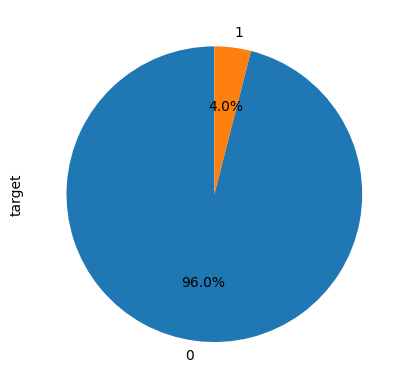

In [9]:
data['target'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)

In [10]:
print('No Frauds', round(data['target'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Frauds', round(data['target'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

No Frauds 96.02 % of the dataset
Frauds 3.98 % of the dataset


Terdapat Imbalance Data. Untuk evaluasi tidak bisa menggunakan Matrix Akurasi

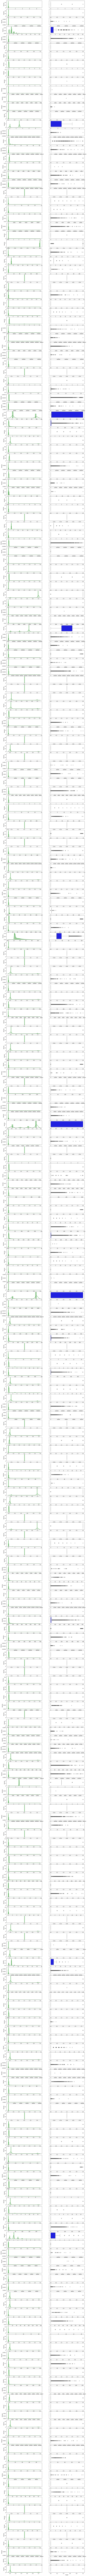

In [11]:
features = list(data.columns)
fig, ax = plt.subplots(len(features),2,figsize=(15,500))
for idx, column in enumerate(features):
    sns.distplot(
        x=data[column],
        color='green',
        ax=ax[idx][0])
    sns.boxplot(
        x=data[column],
        color='blue',
        ax=ax[idx][1]
        )

Dapat dilihat, di beberapa kolom terdapat oulier yang cukup banyak.

# Feature Engineering

## 1.Drop Duplikat

In [12]:
# menghapus duplikat data
print('Data Terduplikat', data.duplicated().sum())
data = data.drop_duplicates()
print('Data Terduplikat', data.duplicated().sum())

Data Terduplikat 98
Data Terduplikat 0


## 2.Outlier Handling

### 1.Diagnosa

In [13]:
def percentage_outlier(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return len(outliers) / len(column) * 100

# Menghitung persentase outlier untuk setiap kolom
outlier_percentages = data.apply(percentage_outlier)

print("Persentase Outlier untuk Setiap Kolom:")
print(outlier_percentages)

Persentase Outlier untuk Setiap Kolom:
var_1       0.050098
var_2       0.006012
var_3       0.050098
var_4       8.204080
var_5       0.533045
var_6       0.004008
var_7       0.010020
var_8       1.168290
var_9       0.008016
var_10      0.004008
var_11      0.004008
var_12      0.004008
var_13      0.386758
var_14      0.002004
var_15      0.006012
var_16      0.202397
var_17     18.822893
var_18      2.833554
var_19      0.995952
var_20      0.010020
var_21     17.237786
var_22      0.394774
var_23      0.000000
var_24      0.118232
var_25      0.533045
var_26      0.468919
var_27      0.645265
var_28      0.008016
var_29      2.410725
var_30      4.597010
var_31     13.841129
var_32      0.134263
var_33      0.000000
var_34      0.002004
var_35     21.051260
var_36      0.002004
var_37      2.336580
var_38      3.787423
var_39      0.160314
var_40      0.186365
var_41     12.843173
var_42      0.058114
var_43      0.092181
var_44      0.000000
var_45      0.070137
var_46      7.65

### 2.Spliting Data

In [14]:
#feats = data.columns[:-1]
#feats

In [15]:
# Menyimpan kolom target sebelum menjatuhkannya
y = pd.DataFrame(data, columns=['target'])
# Jatuhkan kolom target
data.drop(columns=['target'], inplace=True)
data.head()

var_1  var_2  var_3  var_4  var_5  var_6  var_7  var_8  var_9  var_10  \
0      0      0    0.0   0.00    0.0      0      0      0      0       0   
1      0      0    0.0   3.00    0.0      0      0      0      0       0   
2      0      0    0.0   5.88    0.0      0      0      0      0       0   
3      0      0    0.0  14.10    0.0      0      0      0      0       0   
4      0      0    0.0   5.76    0.0      0      0      0      0       0   

   var_11  var_12  var_13  var_14  var_15  var_16  var_17  var_18  var_19  \
0     0.0     0.0     0.0       0       0     0.0     0.0    0.00       0   
1     0.0     0.0     0.0       0       3     0.0     0.0    0.00       0   
2     0.0     0.0     0.0       0       3     0.0     0.0    0.00       0   
3     0.0     0.0     0.0       0       0     0.0     0.0  988.47       0   
4     0.0     0.0     0.0       0       3     0.0     0.0    0.00       0   

   var_20     var_21  var_22  var_23  var_24  var_25  var_26  var_27  var_28  \
0       0     0.0000     0.0       0       0       0     0.0     0.0       0   
1       0     2.7300     0.0       0       0       0     0.0     0.0       0   
2       0    19.8990     0.0       0       0       0     0.0     0.0       0   
3       0     0.0000     0.0       0       0       0     0.0     0.0       0   
4       0  5981.1741     0.0       0       0       0     0.0     0.0       0   

   var_29      var_30  var_31  var_32  var_33  var_34      var_35  var_36  \
0    1.98      0.0000       3     0.0       0       0      0.0000       0   
1    1.92      0.0000       0     0.0       0       0      2.9100       0   
2    1.94  69867.6741       3     0.0       0       0  71397.5526       0   
3    7.44      0.0000       6     0.0       0       0     19.0164       0   
4    1.94      0.0000       3     0.0       0       0   6285.6000       0   

   var_37  var_38  var_39  var_40    var_41  var_42  var_43  var_44  var_45  \
0       0       0     0.0     0.0    0.0000     0.0       0       0       0   
1       0       0     0.0     0.0    0.0000     0.0       0       0       0   
2       0       3     0.0     0.0    0.0000     0.0       0       0       0   
3       0       0     0.0     0.0  614.1627     0.0       0       0       0   
4       0       0     0.0     0.0    0.0000     0.0       0       0       0   

          var_46  var_47  var_48  var_49  var_50  var_51  var_52  var_53  \
0  190245.329100     0.0     0.0      99    0.00       0       0       0   
1  111445.430066     0.0     0.0       2    0.00       0       0       0   
2  112618.539856     0.0     0.0       2   11.04       0       0       0   
3   39852.113400     0.0     0.0       2    5.94       0       0       0   
4  119538.619200     0.0     0.0       1    2.85       0       0       0   

   var_54      var_55  var_56  var_57  var_58  var_59  var_60  var_61  var_62  \
0       0      0.0000       0     0.0       0       0       0       0       3   
1       0      2.6226       0     0.0       0       0       0       0       0   
2       0  22874.0550       0     0.0       3       0       0       0       3   
3       0      0.0000       0  3116.4       0       0       0       0       6   
4       0   4074.2619       0     0.0       0       0       0       0       3   

   var_63  var_64  var_65  var_66  var_67  var_68  var_69  var_70  var_71  \
0       0     0.0     0.0       0       0       0       0       1       0   
1       0     0.0     0.0       0       0       0       0       1       0   
2       0     0.0     0.0       0       0       0       0       1       0   
3       0     0.0     0.0       0       0       0       0       0       0   
4       0     0.0     0.0       0       0       0       0       1       0   

   var_72  var_73  var_74    var_75      var_76  var_77  var_78  var_79  \
0       0       0       2     0.000      0.0000     0.0     0.0     0.0   
1       0       0       0     2.850      0.0000     0.0     0.0     0.0   
2       0       0       2    18.

In [16]:
data.shape, y.shape

((49902, 300), (49902, 1))

In [17]:
# mari kita pisahkan menjadi data train dan data test
# untuk proses outlier digunakan spliting dengan cara seperti dibawah untuk menjaga dimensi data

train, test = train_test_split(data, test_size=0.2, random_state=42)

train.shape, test.shape

#Handling outlier hanya pada data train
#Data test tidak perlu dilakukan handling outlier (data masa depan, untuk melihat performa model)

((39921, 300), (9981, 300))

### 3.Metode IQR

Dengan menggunakan metode IQR, disini saya melihat batas atas dan batas bawah dari setiap kolom yang tersedia.

In [18]:
def batas_IQR (data, nama_kolom, distance):

  IQR = data[nama_kolom].quantile(0.75) - data[nama_kolom].quantile(0.25)

  batas_bawah = data[nama_kolom].quantile(0.25) - (IQR * distance)
  batas_atas = data[nama_kolom].quantile(0.75) - (IQR * distance)

  return batas_bawah, batas_atas

In [19]:
batas_atas = {}
batas_bawah = {}

for nama_kolom in train.columns:
    batas_atas[nama_kolom], batas_bawah[nama_kolom] = batas_IQR(train, nama_kolom, 1.5)

    print(f"Kolom: {nama_kolom}, Batas Atas: {batas_atas[nama_kolom]}, Batas Bawah: {batas_bawah[nama_kolom]}")

Kolom: var_1, Batas Atas: 0.0, Batas Bawah: 0.0
Kolom: var_2, Batas Atas: 0.0, Batas Bawah: 0.0
Kolom: var_3, Batas Atas: 0.0, Batas Bawah: 0.0
Kolom: var_4, Batas Atas: -4.5, Batas Bawah: -1.5
Kolom: var_5, Batas Atas: 0.0, Batas Bawah: 0.0
Kolom: var_6, Batas Atas: 0.0, Batas Bawah: 0.0
Kolom: var_7, Batas Atas: 0.0, Batas Bawah: 0.0
Kolom: var_8, Batas Atas: 0.0, Batas Bawah: 0.0
Kolom: var_9, Batas Atas: 0.0, Batas Bawah: 0.0
Kolom: var_10, Batas Atas: 0.0, Batas Bawah: 0.0
Kolom: var_11, Batas Atas: 0.0, Batas Bawah: 0.0
Kolom: var_12, Batas Atas: 0.0, Batas Bawah: 0.0
Kolom: var_13, Batas Atas: 0.0, Batas Bawah: 0.0
Kolom: var_14, Batas Atas: 0.0, Batas Bawah: 0.0
Kolom: var_15, Batas Atas: -4.5, Batas Bawah: -1.5
Kolom: var_16, Batas Atas: 0.0, Batas Bawah: 0.0
Kolom: var_17, Batas Atas: 0.0, Batas Bawah: 0.0
Kolom: var_18, Batas Atas: 0.0, Batas Bawah: 0.0
Kolom: var_19, Batas Atas: 0.0, Batas Bawah: 0.0
Kolom: var_20, Batas Atas: 0.0, Batas Bawah: 0.0
Kolom: var_21, Batas Atas

Dapat dilihat bahwa batas_atas dan batas_bawah pada data tersebut terdapat pada nilai 0.0

### 4.Capping

In [20]:
# Fungsi untuk batas_outlier
def batas_outlier(train, nama_kolom, batas_atas, batas_bawah):
  train[nama_kolom]= np.where(train[nama_kolom] > batas_atas, batas_atas,
                             np.where(train[nama_kolom] < batas_bawah, batas_bawah, train[nama_kolom]))
  return train

In [21]:
for nama_kolom in train.columns:
  batas_outlier(train, nama_kolom, batas_atas[nama_kolom], batas_bawah[nama_kolom])

Setelah dilakukan pengetokan agar outlier berada pada batas atas dan batas bawa pada dataset, disini akan dilihat perubahan data tersebut.

In [22]:
'''
features = list(train.columns)
fig, ax = plt.subplots(len(features),2,figsize=(15,500))
for idx, column in enumerate(features):
    sns.distplot(
        x=train[column],
        color='green',
        ax=ax[idx][0])
    sns.boxplot(
        x=train[column],
        color='blue',
        ax=ax[idx][1]
        )
'''

"\nfeatures = list(train.columns)\nfig, ax = plt.subplots(len(features),2,figsize=(15,500))\nfor idx, column in enumerate(features):\n    sns.distplot(\n        x=train[column],\n        color='green',\n        ax=ax[idx][0])\n    sns.boxplot(\n        x=train[column],\n        color='blue',\n        ax=ax[idx][1]\n        )\n"

## 3.Feature Scaling

In [23]:
train.shape, test.shape, y.shape

((39921, 300), (9981, 300), (49902, 1))

In [24]:
df_combined = pd.concat([train, test], ignore_index=True) # menambah baris
#df_combined['target'] = target_column['target'] # Menambahkan kolom target dari target_column

In [25]:
df_combined.sample(5)

var_1  var_2  var_3  var_4  var_5  var_6  var_7  var_8  var_9  var_10  \
24973    0.0    0.0    0.0  -4.50    0.0    0.0    0.0    0.0    0.0     0.0   
40594    0.0    0.0    0.0   2.76    0.0    0.0    0.0    0.0    0.0     0.0   
1918     0.0    0.0    0.0  -4.50    0.0    0.0    0.0    0.0    0.0     0.0   
43432    0.0    0.0    0.0   2.97    0.0    0.0    0.0    0.0    0.0     0.0   
31064    0.0    0.0    0.0  -4.50    0.0    0.0    0.0    0.0    0.0     0.0   

       var_11  var_12  var_13  var_14  var_15  var_16  var_17  var_18  var_19  \
24973     0.0     0.0     0.0     0.0    -4.5     0.0     0.0     0.0     0.0   
40594     0.0     0.0     0.0     0.0     3.0     0.0     0.0     0.0     0.0   
1918      0.0     0.0     0.0     0.0    -4.5     0.0     0.0     0.0     0.0   
43432     0.0     0.0     0.0     0.0     3.0     0.0     0.0     0.0     0.0   
31064     0.0     0.0     0.0     0.0    -4.5     0.0     0.0     0.0     0.0   

       var_20  var_21  var_22  var_23  var_24  var_25  var_26  var_27  var_28  \
24973     0.0 -130.95     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
40594     0.0    2.79     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1918      0.0 -130.95     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
43432     0.0    5.58     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
31064     0.0 -130.95     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       var_29  var_30  var_31  var_32  var_33  var_34  var_35  var_36  var_37  \
24973    1.71     0.0     3.0     0.0     0.0     0.0 -338.40     0.0     0.0   
40594    1.86     0.0     3.0     0.0     0.0     0.0    2.97     0.0     0.0   
1918     1.71     0.0     3.0     0.0     0.0     0.0 -338.40     0.0     0.0   
43432    1.90     0.0     3.0     0.0     0.0     0.0    5.52     0.0     0.0   
31064    1.71     0.0     3.0     0.0     0.0     0.0 -338.40     0.0     0.0   

       var_38  var_39  var_40  var_41  var_42  var_43  var_44  var_45  \
24973     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
40594     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1918      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
43432     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
31064     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

              var_46  var_47  var_48  var_49  var_50  var_51  var_52  var_53  \
24973  -14469.718525     0.0     0.0  -143.5  -4.365     0.0     0.0     0.0   
40594  113791.649646     0.0     0.0    99.0   0.000     0.0     0.0     0.0   
1918   -14469.718525     0.0     0.0  -143.5  -4.365     0.0     0.0     0.0   
43432  133458.821100     0.0     0.0     3.0   0.000     0.0     0.0     0.0   
31064  -14469.718525     0.0     0.0  -143.5  -4.365     0.0     0.0     0.0   

       var_54    var_55  var_56  var_57  var_58  var_59  var_60  var_61  \
24973     0.0 -120.0474     0.0     0.0     0.0     0.0     0.0     0.0   
40594     0.0    2.2869     0.0     0.0     0.0     0.0     0.0     0.0   
1918      0.0 -120.0474     0.0     0.0     0.0     0.0     0.0     0.0   
43432     0.0    4.4838     0.0     0.0     0.0     0.0     0.0     0.0   
31064     0.0 -120.0474     0.0     0.0     0.0     0.0     0.0     0.0   

       var_62  var_63  var_64  var_65  var_66  var_67  var_68  var_69  var_70  \
24973     3.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     1.0   
40594     3.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     1.0   
1918      3.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     1.0   
43432     3.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     1.0   
31064     3.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     1.0   

       var_71  var_72  var_73  var_74  var_75   var_76  var_77  var_78  \
24973     0.0     0.0     0.0    -0.5 -126.90 -17.4699     0.0     0.0   
40594     0.0     0.0     0.0     2.0    2.76   0.8928     

In [26]:
df_combined.shape,  y.shape

((49902, 300), (49902, 1))

In [27]:
# Mengambil semua kolom kecuali 'target' untuk X
# X = df_combined.copy()

In [28]:
scaler = StandardScaler()
scaler.fit(df_combined)
X_std = scaler.transform(df_combined)

In [29]:
# mengambil semua nama kolom kecuali kolom terakhir
feats = df_combined.columns

In [30]:
feats

Index(['var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7', 'var_8',
       'var_9', 'var_10',
       ...
       'var_291', 'var_292', 'var_293', 'var_294', 'var_295', 'var_296',
       'var_297', 'var_298', 'var_299', 'var_300'],
      dtype='object', length=300)

In [31]:
# membuat dataframe baru new_df
new_df = pd.DataFrame(data = X_std, columns = feats)
new_df.head()

var_1  var_2     var_3     var_4     var_5     var_6  var_7     var_8  \
0 -0.010152    0.0 -0.007499 -0.463745 -0.025616 -0.004477    0.0 -0.047851   
1 -0.010152    0.0 -0.007499 -0.463745 -0.025616 -0.004477    0.0 -0.047851   
2 -0.010152    0.0 -0.007499 -0.463745 -0.025616 -0.004477    0.0 -0.047851   
3 -0.010152    0.0 -0.007499 -0.463745 -0.025616 -0.004477    0.0 -0.047851   
4 -0.010152    0.0 -0.007499 -0.463745 -0.025616 -0.004477    0.0 -0.047851   

      var_9  var_10    var_11  var_12    var_13  var_14    var_15    var_16  \
0 -0.004477     0.0 -0.004477     0.0 -0.012775     0.0 -0.485479 -0.013022   
1 -0.004477     0.0 -0.004477     0.0 -0.012775     0.0 -0.485479 -0.013022   
2 -0.004477     0.0 -0.004477     0.0 -0.012775     0.0 -0.485479 -0.013022   
3 -0.004477     0.0 -0.004477     0.0 -0.012775     0.0 -0.485479 -0.013022   
4 -0.004477     0.0 -0.004477     0.0 -0.012775     0.0 -0.485479 -0.013022   

     var_17    var_18    var_19    var_20    var_21    var_22  var_23  \
0 -0.154903 -0.022571 -0.045919 -0.006006 -0.053727 -0.018022     0.0   
1 -0.154903 -0.022571 -0.045919 -0.006006 -0.053727 -0.018022     0.0   
2 -0.154903 -0.022571 -0.045919 -0.006006 -0.053727 -0.018022     0.0   
3 -0.154903 -0.022571 -0.045919 -0.006006 -0.053727 -0.018022     0.0   
4 -0.154903 -0.022571 -0.045919 -0.006006 -0.053727 -0.018022     0.0   

     var_24    var_25    var_26    var_27    var_28    var_29    var_30  \
0 -0.011441 -0.033294 -0.015691 -0.029833 -0.004477  0.016125 -0.050617   
1 -0.011441 -0.033294 -0.015691 -0.029833 -0.004477  0.016125 -0.050617   
2 -0.011441 -0.033294 -0.015691 -0.029833 -0.004477  0.016125 -0.050617   
3 -0.011441 -0.033294 -0.015691 -0.029833 -0.004477  0.016125 -0.050617   
4 -0.011441 -0.033294 -0.015691 -0.029833 -0.004477  0.016125 -0.050617   

     var_31    var_32  var_33  var_34   var_35  var_36    var_37    var_38  \
0  0.117825 -0.007742     0.0     0.0 -0.09486     0.0 -0.057008 -0.089095   
1  0.117825 -0.007742     0.0     0.0 -0.09486     0.0 -0.057008 -0.089095   
2  0.117825 -0.007742     0.0     0.0 -0.09486     0.0 -0.057008 -0.089095   
3  0.117825 -0.007742     0.0     0.0 -0.09486     0.0 -0.057008 -0.089095   
4  0.117825 -0.007742     0.0     0.0 -0.09486     0.0 -0.057008 -0.089095   

     var_39    var_40    var_41    var_42    var_43  var_44    var_45  \
0 -0.012943 -0.012005 -0.094579 -0.008441 -0.012663     0.0 -0.014157   
1 -0.012943 -0.012005 -0.094579 -0.008441 -0.012663     0.0 -0.014157   
2 -0.012943 -0.012005 -0.094579 -0.008441 -0.012663     0.0 -0.014157   
3 -0.012943 -0.012005 -0.094579 -0.008441 -0.012663     0.0 -0.014157   
4 -0.012943 -0.012005 -0.094579 -0.008441 -0.012663     0.0 -0.014157   

     var_46    var_47    var_48    var_49    var_50    var_51    var_52  \
0 -0.285213 -0.067694 -0.008771 -0.480508 -0.287976 -0.041393 -0.093884   
1 -0.285213 -0.067694 -0.008771 -0.480508 -0.287976 -0.041393 -0.093884   
2 -0.285213 -0.067694 -0.008771 -0.480508 -0.287976 -0.041393 -0.093884   
3 -0.285213 -0.067694 -0.008771 -0.480508 -0.287976 -0.041393 -0.093884   
4 -0.285213 -0.067694 -0.008771 -0.480508 -0.287976 -0.041393 -0.093884   

     var_53    var_54    var_55    var_56    var_57    var_58    var_59  \
0 -0.014157 -0.046355 -0.061024 -0.018996 -0.068639 -0.114114 -0.007179   
1 -0.014157 -0.046355 -0.061024 -0.018996 -0.068639 -0.114114 -0.007179   
2 -0.014157 -0.046355 -0.061024 -0.018996 -0.068639 -0.114114 -0.007179   
3 -0.014157 -0.046355 -0.061024 -0.018996 -0.068639 -0.114114 -0.007179   
4 -0.014157 -0.046355 -0.061024 -0.018996 -0.068639 -0.114114 -0.007179   

     var_60  var_61    var_62    var_63    var_64  var_65  var_66  var_67  \
0 -0.010966     0.0  0.105576 -0.029707 -0.066878     0.0     0.0     0.0   
1 -0.010966     0.0  0.105576 -0.029707 -0.066878     0.0     0.0     0.0   
2 -0.010966     0.0  0.105576 -0.029707 -0.066878     0.0     0.0     0.0   
3 -0.010966     0.0  0.105576 -0.029707 -0.06687

In [32]:
data_tanpa_pca = new_df.copy()

## 4.PCA

In [33]:
from sklearn.decomposition import PCA #proses PCA

pca = PCA()
#input n_component dicoba sebanyak kolom yang ada pada dataset
principal_components = pca.fit_transform(new_df)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

In [34]:
print('Explained variance:', explained_variance_ratio)
print('Cumulative explained variance:', cumulative_explained_variance)

Explained variance: [1.09214618e-01 6.08672008e-02 5.24505258e-02 4.27113539e-02
 3.97574655e-02 3.81052983e-02 3.51540296e-02 3.45177142e-02
 2.93012028e-02 2.86504318e-02 2.35246573e-02 2.17912212e-02
 1.92891983e-02 1.79278441e-02 1.77806327e-02 1.72680378e-02
 1.70507337e-02 1.59749040e-02 1.54354462e-02 1.44769702e-02
 1.43266572e-02 1.36539772e-02 1.33635968e-02 1.29773043e-02
 1.18815232e-02 1.12170278e-02 1.04829863e-02 9.76468324e-03
 9.53394213e-03 9.41735984e-03 8.64697940e-03 8.22748674e-03
 7.78883687e-03 7.53740391e-03 7.12220041e-03 6.99808542e-03
 6.89901747e-03 6.82789268e-03 6.30717835e-03 6.21392981e-03
 5.76789133e-03 5.43955653e-03 5.35093645e-03 5.06485783e-03
 4.92096141e-03 4.81218788e-03 4.50192432e-03 4.33433484e-03
 4.24843677e-03 4.21915614e-03 4.10879017e-03 3.96867602e-03
 3.79782639e-03 3.61360270e-03 3.56496809e-03 3.50407066e-03
 3.38915702e-03 3.34553266e-03 3.26705123e-03 3.09937762e-03
 3.04671869e-03 2.90898290e-03 2.86312730e-03 2.72470250e-03
 2.6

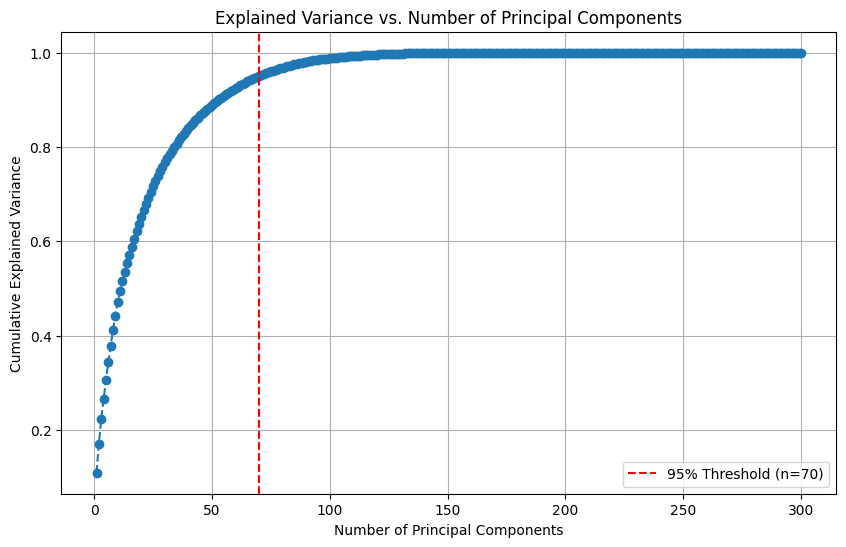

In [35]:
# Find the number of components that explain 95% of the variance
n_components_95 = np.argmax(cumulative_explained_variance >= 0.95) + 1

# Plotting the explained variance with a horizontal line at 95%
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.axvline(x=n_components_95, color='r', linestyle='--', label=f'95% Threshold (n={n_components_95})')
plt.title('Explained Variance vs. Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.grid(True)
plt.show()

Dari gambar diatas dapat dilihat, bahwa dengan menggunakan 70 dari 300 kolom pada dataset sudah mencapai 95%

In [36]:
#ambil kolom yang berjumlah 95% distribusi
pca = PCA(n_components=n_components_95)
principal_components = pca.fit_transform(new_df)
principal_components

array([[-1.44686886e+00, -5.36488976e-01,  2.53292768e-02, ...,
        -2.28716554e-03, -2.33132587e-03, -2.40801435e-03],
       [-1.44686886e+00, -5.36488976e-01,  2.53292768e-02, ...,
        -2.28716554e-03, -2.33132587e-03, -2.40801435e-03],
       [-1.44686886e+00, -5.36488976e-01,  2.53292768e-02, ...,
        -2.28716554e-03, -2.33132587e-03, -2.40801435e-03],
       ...,
       [ 2.21019159e+00,  1.63469387e+00, -2.24941022e-02, ...,
        -2.98232010e-01, -2.43089200e-01,  2.21986866e-01],
       [ 1.31121239e+01, -4.18392054e+00, -8.11242700e-01, ...,
        -1.13350368e+00,  2.90037456e-01,  1.19051730e+00],
       [ 1.80093903e+01, -3.17239290e+00, -5.13107953e-01, ...,
        -9.57346019e-01,  6.11345249e-01,  7.92007204e-01]])

In [37]:
# Membuat DataFrame untuk komponen utama
principal_components_df = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, n_components_95 + 1)])

principal_components_df.head()

PC1       PC2       PC3       PC4       PC5      PC6       PC7  \
0 -1.446869 -0.536489  0.025329  0.115469  0.276504 -0.22015 -0.404386   
1 -1.446869 -0.536489  0.025329  0.115469  0.276504 -0.22015 -0.404386   
2 -1.446869 -0.536489  0.025329  0.115469  0.276504 -0.22015 -0.404386   
3 -1.446869 -0.536489  0.025329  0.115469  0.276504 -0.22015 -0.404386   
4 -1.446869 -0.536489  0.025329  0.115469  0.276504 -0.22015 -0.404386   

        PC8      PC9      PC10      PC11      PC12     PC13      PC14  \
0  0.240739  0.51531  0.508239  0.063292 -0.195654 -0.00122 -0.014529   
1  0.240739  0.51531  0.508239  0.063292 -0.195654 -0.00122 -0.014529   
2  0.240739  0.51531  0.508239  0.063292 -0.195654 -0.00122 -0.014529   
3  0.240739  0.51531  0.508239  0.063292 -0.195654 -0.00122 -0.014529   
4  0.240739  0.51531  0.508239  0.063292 -0.195654 -0.00122 -0.014529   

       PC15      PC16      PC17      PC18      PC19      PC20      PC21  \
0 -0.087635  0.060717 -0.034662 -0.029939  0.065533 -0.069719 -0.048081   
1 -0.087635  0.060717 -0.034662 -0.029939  0.065533 -0.069719 -0.048081   
2 -0.087635  0.060717 -0.034662 -0.029939  0.065533 -0.069719 -0.048081   
3 -0.087635  0.060717 -0.034662 -0.029939  0.065533 -0.069719 -0.048081   
4 -0.087635  0.060717 -0.034662 -0.029939  0.065533 -0.069719 -0.048081   

       PC22      PC23      PC24      PC25      PC26      PC27      PC28  \
0 -0.007676  0.045739 -0.045322 -0.026707 -0.067241 -0.032057  0.045221   
1 -0.007676  0.045739 -0.045322 -0.026707 -0.067241 -0.032057  0.045221   
2 -0.007676  0.045739 -0.045322 -0.026707 -0.067241 -0.032057  0.045221   
3 -0.007676  0.045739 -0.045322 -0.026707 -0.067241 -0.032057  0.045221   
4 -0.007676  0.045739 -0.045322 -0.026707 -0.067241 -0.032057  0.045221   

       PC29      PC30      PC31      PC32     PC33      PC34      PC35  \
0 -0.068425 -0.002684  0.011894  0.033086  0.02704 -0.001694 -0.051692   
1 -0.068425 -0.002684  0.011894  0.033086  0.02704 -0.001694 -0.051692   
2 -0.068425 -0.002684  0.011894  0.033086  0.02704 -0.001694 -0.051692   
3 -0.068425 -0.002684  0.011894  0.033086  0.02704 -0.001694 -0.051692   
4 -0.068425 -0.002684  0.011894  0.033086  0.02704 -0.001694 -0.051692   

       PC36      PC37     PC38      PC39      PC40      PC41      PC42  \
0  0.004592  0.023263 -0.00297 -0.024678  0.017215 -0.000174  0.006016   
1  0.004592  0.023263 -0.00297 -0.024678  0.017215 -0.000174  0.006016   
2  0.004592  0.023263 -0.00297 -0.024678  0.017215 -0.000174  0.006016   
3  0.004592  0.023263 -0.00297 -0.024678  0.017215 -0.000174  0.006016   
4  0.004592  0.023263 -0.00297 -0.024678  0.017215 -0.000174  0.006016   

       PC43      PC44      PC45      PC46      PC47      PC48      PC49  \
0 -0.011881  0.003243 -0.010474 -0.019881 -0.000913  0.008723 -0.001318   
1 -0.011881  0.003243 -0.010474 -0.019881 -0.000913  0.008723 -0.001318   
2 -0.011881  0.003243 -0.010474 -0.019881 -0.000913  0.008723 -0.001318   
3 -0.011881  0.003243 -0.010474 -0.019881 -0.000913  0.008723 -0.001318   
4 -0.011881  0.003243 -0.010474 -0.019881 -0.000913  0.008723 -0.001318   

       PC50      PC51    PC52      PC53      PC54      PC55      PC56  \
0 -0.001638 -0.002572  0.0021 -0.004883  0.005334 -0.000835 -0.003122   
1 -0.001638 -0.002572  0.0021 -0.004883  0.005334 -0.000835 -0.003122   
2 -0.001638 -0.002572  0.0021 -0.004883  0.005334 -0.000835 -0.003122   
3 -0.001638 -0.002572  0.0021 -0.004883  0.005334 -0.000835 -0.003122   
4 -0.001638 -0.002572  0.0021 -0.004883  0.005334 -0.000835 -0.003122   

       PC57      PC58      PC59      PC60      PC61      PC62      PC63  \
0  0.006117 -0.001566  0.005312 -0.000755  0.000481  0.001055 -0.010945   
1  0.006117 -0.001566  0.005312 -0.000755  0.000481  0.001055 -0.010945   
2  0.006117 -0.001566  0.005312 -0.000755  0.000481  0.001055 -0.010945   
3  0.006117 -0.001566  0.005312 -0.000755  0.000481  0.001055 -0.010945   
4  0.006117 -0.001566  0.005312 -0.000755  0.000481  0.001055 -0.01

# Modeling

## 1.Tanpa PCA

### Preparation Data

In [38]:
# Dataset yang digunaan tanpa PCA
data_tanpa_pca.head()

var_1  var_2     var_3     var_4     var_5     var_6  var_7     var_8  \
0 -0.010152    0.0 -0.007499 -0.463745 -0.025616 -0.004477    0.0 -0.047851   
1 -0.010152    0.0 -0.007499 -0.463745 -0.025616 -0.004477    0.0 -0.047851   
2 -0.010152    0.0 -0.007499 -0.463745 -0.025616 -0.004477    0.0 -0.047851   
3 -0.010152    0.0 -0.007499 -0.463745 -0.025616 -0.004477    0.0 -0.047851   
4 -0.010152    0.0 -0.007499 -0.463745 -0.025616 -0.004477    0.0 -0.047851   

      var_9  var_10    var_11  var_12    var_13  var_14    var_15    var_16  \
0 -0.004477     0.0 -0.004477     0.0 -0.012775     0.0 -0.485479 -0.013022   
1 -0.004477     0.0 -0.004477     0.0 -0.012775     0.0 -0.485479 -0.013022   
2 -0.004477     0.0 -0.004477     0.0 -0.012775     0.0 -0.485479 -0.013022   
3 -0.004477     0.0 -0.004477     0.0 -0.012775     0.0 -0.485479 -0.013022   
4 -0.004477     0.0 -0.004477     0.0 -0.012775     0.0 -0.485479 -0.013022   

     var_17    var_18    var_19    var_20    var_21    var_22  var_23  \
0 -0.154903 -0.022571 -0.045919 -0.006006 -0.053727 -0.018022     0.0   
1 -0.154903 -0.022571 -0.045919 -0.006006 -0.053727 -0.018022     0.0   
2 -0.154903 -0.022571 -0.045919 -0.006006 -0.053727 -0.018022     0.0   
3 -0.154903 -0.022571 -0.045919 -0.006006 -0.053727 -0.018022     0.0   
4 -0.154903 -0.022571 -0.045919 -0.006006 -0.053727 -0.018022     0.0   

     var_24    var_25    var_26    var_27    var_28    var_29    var_30  \
0 -0.011441 -0.033294 -0.015691 -0.029833 -0.004477  0.016125 -0.050617   
1 -0.011441 -0.033294 -0.015691 -0.029833 -0.004477  0.016125 -0.050617   
2 -0.011441 -0.033294 -0.015691 -0.029833 -0.004477  0.016125 -0.050617   
3 -0.011441 -0.033294 -0.015691 -0.029833 -0.004477  0.016125 -0.050617   
4 -0.011441 -0.033294 -0.015691 -0.029833 -0.004477  0.016125 -0.050617   

     var_31    var_32  var_33  var_34   var_35  var_36    var_37    var_38  \
0  0.117825 -0.007742     0.0     0.0 -0.09486     0.0 -0.057008 -0.089095   
1  0.117825 -0.007742     0.0     0.0 -0.09486     0.0 -0.057008 -0.089095   
2  0.117825 -0.007742     0.0     0.0 -0.09486     0.0 -0.057008 -0.089095   
3  0.117825 -0.007742     0.0     0.0 -0.09486     0.0 -0.057008 -0.089095   
4  0.117825 -0.007742     0.0     0.0 -0.09486     0.0 -0.057008 -0.089095   

     var_39    var_40    var_41    var_42    var_43  var_44    var_45  \
0 -0.012943 -0.012005 -0.094579 -0.008441 -0.012663     0.0 -0.014157   
1 -0.012943 -0.012005 -0.094579 -0.008441 -0.012663     0.0 -0.014157   
2 -0.012943 -0.012005 -0.094579 -0.008441 -0.012663     0.0 -0.014157   
3 -0.012943 -0.012005 -0.094579 -0.008441 -0.012663     0.0 -0.014157   
4 -0.012943 -0.012005 -0.094579 -0.008441 -0.012663     0.0 -0.014157   

     var_46    var_47    var_48    var_49    var_50    var_51    var_52  \
0 -0.285213 -0.067694 -0.008771 -0.480508 -0.287976 -0.041393 -0.093884   
1 -0.285213 -0.067694 -0.008771 -0.480508 -0.287976 -0.041393 -0.093884   
2 -0.285213 -0.067694 -0.008771 -0.480508 -0.287976 -0.041393 -0.093884   
3 -0.285213 -0.067694 -0.008771 -0.480508 -0.287976 -0.041393 -0.093884   
4 -0.285213 -0.067694 -0.008771 -0.480508 -0.287976 -0.041393 -0.093884   

     var_53    var_54    var_55    var_56    var_57    var_58    var_59  \
0 -0.014157 -0.046355 -0.061024 -0.018996 -0.068639 -0.114114 -0.007179   
1 -0.014157 -0.046355 -0.061024 -0.018996 -0.068639 -0.114114 -0.007179   
2 -0.014157 -0.046355 -0.061024 -0.018996 -0.068639 -0.114114 -0.007179   
3 -0.014157 -0.046355 -0.061024 -0.018996 -0.068639 -0.114114 -0.007179   
4 -0.014157 -0.046355 -0.061024 -0.018996 -0.068639 -0.114114 -0.007179   

     var_60  var_61    var_62    var_63    var_64  var_65  var_66  var_67  \
0 -0.010966     0.0  0.105576 -0.029707 -0.066878     0.0     0.0     0.0   
1 -0.010966     0.0  0.105576 -0.029707 -0.066878     0.0     0.0     0.0   
2 -0.010966     0.0  0.105576 -0.029707 -0.066878     0.0     0.0     0.0   
3 -0.010966     0.0  0.105576 -0.029707 -0.06687

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(data_tanpa_pca, y, test_size = 0.25, random_state = 42)

## Model

In [40]:
# Inisialisasi model Random Forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Latih model
random_forest.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [41]:
# Lakukan prediksi pada data pengujian
predictions = random_forest.predict(X_test)

## 2.PCA

### Preparation Data

In [42]:
# Dataset untuk PCA
principal_components_df.head()

PC1       PC2       PC3       PC4       PC5      PC6       PC7  \
0 -1.446869 -0.536489  0.025329  0.115469  0.276504 -0.22015 -0.404386   
1 -1.446869 -0.536489  0.025329  0.115469  0.276504 -0.22015 -0.404386   
2 -1.446869 -0.536489  0.025329  0.115469  0.276504 -0.22015 -0.404386   
3 -1.446869 -0.536489  0.025329  0.115469  0.276504 -0.22015 -0.404386   
4 -1.446869 -0.536489  0.025329  0.115469  0.276504 -0.22015 -0.404386   

        PC8      PC9      PC10      PC11      PC12     PC13      PC14  \
0  0.240739  0.51531  0.508239  0.063292 -0.195654 -0.00122 -0.014529   
1  0.240739  0.51531  0.508239  0.063292 -0.195654 -0.00122 -0.014529   
2  0.240739  0.51531  0.508239  0.063292 -0.195654 -0.00122 -0.014529   
3  0.240739  0.51531  0.508239  0.063292 -0.195654 -0.00122 -0.014529   
4  0.240739  0.51531  0.508239  0.063292 -0.195654 -0.00122 -0.014529   

       PC15      PC16      PC17      PC18      PC19      PC20      PC21  \
0 -0.087635  0.060717 -0.034662 -0.029939  0.065533 -0.069719 -0.048081   
1 -0.087635  0.060717 -0.034662 -0.029939  0.065533 -0.069719 -0.048081   
2 -0.087635  0.060717 -0.034662 -0.029939  0.065533 -0.069719 -0.048081   
3 -0.087635  0.060717 -0.034662 -0.029939  0.065533 -0.069719 -0.048081   
4 -0.087635  0.060717 -0.034662 -0.029939  0.065533 -0.069719 -0.048081   

       PC22      PC23      PC24      PC25      PC26      PC27      PC28  \
0 -0.007676  0.045739 -0.045322 -0.026707 -0.067241 -0.032057  0.045221   
1 -0.007676  0.045739 -0.045322 -0.026707 -0.067241 -0.032057  0.045221   
2 -0.007676  0.045739 -0.045322 -0.026707 -0.067241 -0.032057  0.045221   
3 -0.007676  0.045739 -0.045322 -0.026707 -0.067241 -0.032057  0.045221   
4 -0.007676  0.045739 -0.045322 -0.026707 -0.067241 -0.032057  0.045221   

       PC29      PC30      PC31      PC32     PC33      PC34      PC35  \
0 -0.068425 -0.002684  0.011894  0.033086  0.02704 -0.001694 -0.051692   
1 -0.068425 -0.002684  0.011894  0.033086  0.02704 -0.001694 -0.051692   
2 -0.068425 -0.002684  0.011894  0.033086  0.02704 -0.001694 -0.051692   
3 -0.068425 -0.002684  0.011894  0.033086  0.02704 -0.001694 -0.051692   
4 -0.068425 -0.002684  0.011894  0.033086  0.02704 -0.001694 -0.051692   

       PC36      PC37     PC38      PC39      PC40      PC41      PC42  \
0  0.004592  0.023263 -0.00297 -0.024678  0.017215 -0.000174  0.006016   
1  0.004592  0.023263 -0.00297 -0.024678  0.017215 -0.000174  0.006016   
2  0.004592  0.023263 -0.00297 -0.024678  0.017215 -0.000174  0.006016   
3  0.004592  0.023263 -0.00297 -0.024678  0.017215 -0.000174  0.006016   
4  0.004592  0.023263 -0.00297 -0.024678  0.017215 -0.000174  0.006016   

       PC43      PC44      PC45      PC46      PC47      PC48      PC49  \
0 -0.011881  0.003243 -0.010474 -0.019881 -0.000913  0.008723 -0.001318   
1 -0.011881  0.003243 -0.010474 -0.019881 -0.000913  0.008723 -0.001318   
2 -0.011881  0.003243 -0.010474 -0.019881 -0.000913  0.008723 -0.001318   
3 -0.011881  0.003243 -0.010474 -0.019881 -0.000913  0.008723 -0.001318   
4 -0.011881  0.003243 -0.010474 -0.019881 -0.000913  0.008723 -0.001318   

       PC50      PC51    PC52      PC53      PC54      PC55      PC56  \
0 -0.001638 -0.002572  0.0021 -0.004883  0.005334 -0.000835 -0.003122   
1 -0.001638 -0.002572  0.0021 -0.004883  0.005334 -0.000835 -0.003122   
2 -0.001638 -0.002572  0.0021 -0.004883  0.005334 -0.000835 -0.003122   
3 -0.001638 -0.002572  0.0021 -0.004883  0.005334 -0.000835 -0.003122   
4 -0.001638 -0.002572  0.0021 -0.004883  0.005334 -0.000835 -0.003122   

       PC57      PC58      PC59      PC60      PC61      PC62      PC63  \
0  0.006117 -0.001566  0.005312 -0.000755  0.000481  0.001055 -0.010945   
1  0.006117 -0.001566  0.005312 -0.000755  0.000481  0.001055 -0.010945   
2  0.006117 -0.001566  0.005312 -0.000755  0.000481  0.001055 -0.010945   
3  0.006117 -0.001566  0.005312 -0.000755  0.000481  0.001055 -0.010945   
4  0.006117 -0.001566  0.005312 -0.000755  0.000481  0.001055 -0.01

In [43]:
principal_components_df.isna().sum().max()

0

In [44]:
X_train_pca, X_test_pca, Y_train_pca, Y_test_pca = train_test_split(principal_components_df, y, test_size = 0.25, random_state = 42)

In [45]:
# Inisialisasi model Random Forest dengan menggunakan data yang sudah di lakukan proses PCA
random_forest_PCA = RandomForestClassifier(n_estimators=100, random_state=42)

# Latih model
random_forest_PCA.fit(X_train_pca, Y_train_pca)

RandomForestClassifier(random_state=42)

In [46]:
# Lakukan prediksi pada data pengujian
predictions_PCA = random_forest_PCA.predict(X_test_pca)

# Evaluation Model PCA VS Non PCA

Karena dataset memiliki data yang tidak seimbang (imbalance), yaitu ketika kelas-kelas target memiliki jumlah observasi yang tidak seimbang, menggunakan akurasi saja sebagai metrik evaluasi bisa menjadi kurang informatif.

In [47]:
# Evaluasi model
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy:", accuracy)
accuracy = accuracy_score(Y_test_pca, predictions_PCA)
print("Accuracy dengan PCA:", accuracy)
print()

precision = precision_score(Y_test, predictions)
print("Precision:", precision)
precision = precision_score(Y_test_pca, predictions_PCA)
print("Precision dengan PCA:", precision)
print()

recall = recall_score(Y_test, predictions)
print("Recall:", recall)
recall = recall_score(Y_test_pca, predictions_PCA)
print("Recall dengan PCA:", recall)
print()

f1 = f1_score(Y_test, predictions)
print("F1-Score:", f1)
f1 = f1_score(Y_test_pca, predictions_PCA)
print("F1-Score dengan PCA:", f1)
print()

auc_roc = roc_auc_score(Y_test, predictions)
print("AUC-ROC:", auc_roc)
auc_roc = roc_auc_score(Y_test_pca, predictions_PCA)
print("AUC-ROC dengan PCA:", auc_roc)
print()

auc_pr = average_precision_score(Y_test, predictions)
print("AUC-PR:", auc_pr)
auc_pr = average_precision_score(Y_test_pca, predictions_PCA)
print("AUC-PR dengan PCA:", auc_pr)

Accuracy: 0.9593619749919846
Accuracy dengan PCA: 0.9592818210965053

Precision: 0.3333333333333333
Precision dengan PCA: 0.0

Recall: 0.001976284584980237
Recall dengan PCA: 0.0

F1-Score: 0.003929273084479371
F1-Score dengan PCA: 0.0

AUC-ROC: 0.5009046001036848
AUC-ROC dengan PCA: 0.49991645781119465

AUC-PR: 0.04113647874538349
AUC-PR dengan PCA: 0.040557871112536066
